# <a>Projeto ENEM 2021 - Análise Exploratória de Dados</a>

*Projeto criado a partir da formação - Jornada Cientista da Dados - Let's Data*

## <a> Objeto de Estudo </a>

Utilização dos dados do ENEM 2021, obtidos diretamente da plataforma do [INEP](https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem). O Exame Nacional do Ensino Médio (ENEM) tem como objetivo avaliar o desempenho dos estudantes que concluíram o ensino médio em relação às competências e habilidades desenvolvidas ao longo do ensino básico. O exame também serve como uma forma de seleção para acesso a instituições de ensino superior públicas e privadas, além de ser utilizado como critério para acesso a programas de financiamento estudantil, como o Fundo de Financiamento Estudantil (FIES) e o Programa Universidade para Todos (ProUni).

Além disso, o ENEM também permite que o Ministério da Educação (MEC) obtenha informações sobre o perfil dos estudantes que realizam o exame, como suas condições socioeconômicas, níveis de escolaridade e desempenho em áreas específicas do conhecimento. Esses dados são importantes para o planejamento e a implementação de políticas públicas voltadas para a educação no país.

A análise dos dados dos estudantes pode fornecer insights que ajudam a direcionar a educação brasileira. Para o presente estudo vamos avaliar se dados demográficos, indicadores sociais, de escolaridade dos pais e outras indicações tem correlações com as notas dos candidatos. Muitos insights e respostas podem ser obtidas somente com a análise exploratória de dados.



In [2]:
## importação de bibliotecas para leitura e dataviz
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

#configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
import numpy as np

In [4]:
import plotly.express as px

In [3]:
#Instalação do pyarrow para conversão da base de CSV para PARQUET (redução do tamanho total)
!pip install pyarrow

In [4]:
#criação do dataframe com os dados do ENEM 2021 e conversão para parquet
df_enem2021_csv = pd.read_csv('./DADOS/MICRODADOS_ENEM_2021.csv', encoding ='latin1', sep=';')
df_enem2021_csv.to_parquet('./DADOS/dadosenem2021.parquet')


In [5]:
df_enem2021 = pd.read_parquet('./DADOS/dadosenem2021.parquet')
df_enem2021.shape

(3389832, 76)

In [6]:
df_enem2021.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.00,892.00,NaN,NaN,574.60,472.60,NaN,None,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,None,1,None,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,None,1.00,140.00,120.00,120.00,180.00,200.00,760.00,F,F,B,B,3.00,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.00,882.00,891.00,901.00,505.90,551.80,498.30,461.50,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,B,B,3.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.00,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.00,0,2304202.00,Crato,23.00,CE,2.00,1.00,1.00,2304202,Crato,23,CE,1,1,1,1,911.00,880.00,890.00,902.00,580.70,678.90,638.90,659.50,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.00,120.00,180.00,120.00,200.00,160.00,780.00,B,B,B,B,6.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.00,0,2311603.00,Redenção,23.00,CE,2.00,1.00,1.00,2300150,Acarape,23,CE,1,1,1,1,912.00,882.00,891.00,901.00,497.70,532.40,457.60,582.60,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.00,120.00,140.00,160.00,180.00,180.00,780.00,D,E,F,D,4.00,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


In [7]:
#Informações das colunas
df_enem2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [6]:
#Listar colunas iniciadas por TX e CO, estas últimas não serão utilizadas na análise.

colunas_tx = [coluna for coluna in df_enem2021.columns if coluna.startswith('TX_')]
print(colunas_tx)

colunas_co = [coluna for coluna in df_enem2021.columns if coluna.startswith('CO_')]
print(colunas_co)

colunas_notas = [coluna for coluna in df_enem2021.columns if 'NOTA' in coluna]
print(colunas_notas)

['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']
['CO_MUNICIPIO_ESC', 'CO_UF_ESC', 'CO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT']
['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']


In [7]:
#Remover as colunas não utilizadas na análise
colunas_remover = colunas_tx + colunas_co
df_enem2021 = df_enem2021.drop(colunas_remover, axis=1)

In [10]:
df_enem2021.shape


(3389832, 60)

## <a> Dicionário de Dados</a>

Os dados gerados pela plataforma do INEP apresentam listas numéricas para diversas colunas. As descrições correspodentes são disponibilizadas em arquivo anexo(.csv). Porém para facilitar a análise e visualização dos dados, as tabelas mais utilizadas para geração dos insights estão dispostas abaixo:
    
### Colunas de notas

| Coluna     | Descrição                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ciências da Natureza |
| NU_NOTA_CH | Nota da prova de Ciências Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e Códigos |
| NU_NOTA_MT | Nota da prova de Matemática           |

### Conclusão Nível Médio

| Código | Descrição                                              |
|--------|--------------------------------------------------------|
| 1      | Já concluí o   Ensino Médio                            |
| 2      | Estou   cursando e concluirei o Ensino Médio em 2019   |
| 3      | Estou   cursando e concluirei o Ensino Médio após 2019 |
| 4      | Não   concluí e não estou cursando o Ensino Médio      |

### Cor/Raça (TP_COR_RACA)

| Código | Descrição     |
|--------|---------------|
| 0      | Não declarado |
| 1      | Branca        |
| 2      | Preta         |
| 3      | Parda         |
| 4      | Amarela       |
| 5      | Indígena      |

### Renda Familiar (Q006)

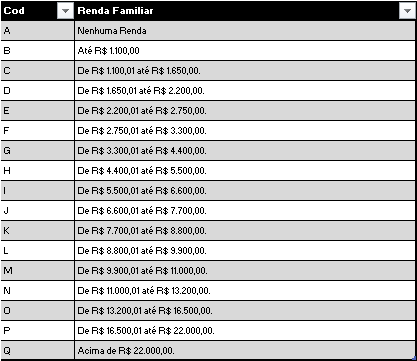






## <a>Estatística Descritiva</a>

Para melhor escolha dos dados a serem analisados é feita a verificação das medidas estatísticas mais relevantes, como tendência central, separatrizes (1º quartil, mediana, 3º quartil), média, min e max (identificação de outliers).

In [11]:
#Listar colunas de notas e retirar as notas parciais de redação
colunas_notas = [coluna for coluna in colunas_notas if 'COMP' not in coluna]
print(colunas_notas)

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']


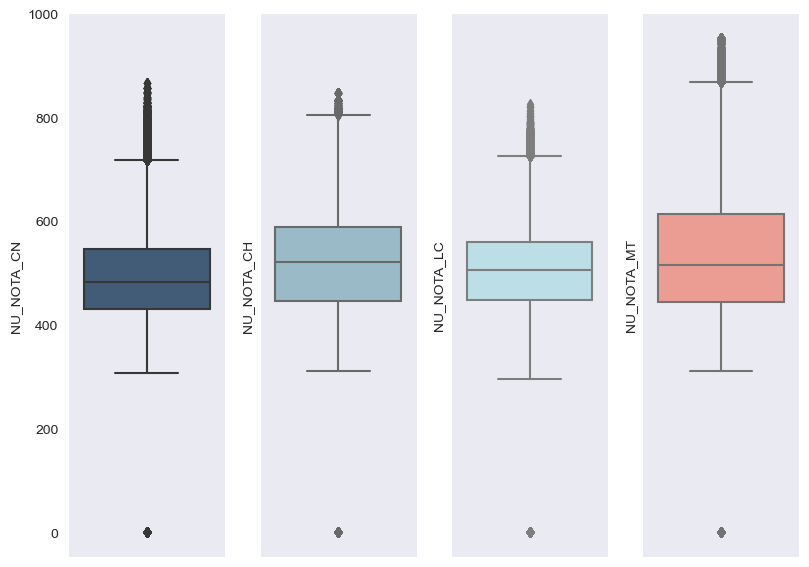

In [8]:
#Análise das notas por tipo

sns.set_style("dark")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

cores = ['#395b80','#92bdcd','#b5e2ee','#f99186']
for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_enem2021, y=coluna_1, ax=graficos[i], color=cores[i])

In [1]:
#Análise da distrubuição das notas
sns.set_style("darkgrid")
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(8,6), tight_layout=True)

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.histplot(data=df_enem2021[coluna_1], ax=graficos[i], color=cores[i]).set_title(coluna_1)


NameError: name 'sns' is not defined

Text(0.5, 1.0, 'Nota da Redação - Densidade')

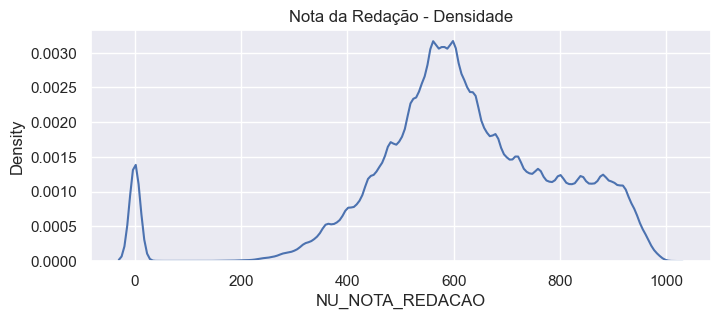

In [14]:
#Análise das notas de Redação utilizando gráfico de densidade
sns.set(rc={'figure.figsize':(8,3)})
sns.kdeplot(data=df_enem2021['NU_NOTA_REDACAO']).set_title('Nota da Redação - Densidade')

## <a>Análise dos dados</a> 

### Por Sexo

In [15]:
#Percentual dos candidatos x sexo
df_enem2021['TP_SEXO'].value_counts(normalize=True)*100

F   61.67
M   38.33
Name: TP_SEXO, dtype: float64

<Axes: xlabel='TP_SEXO', ylabel='count'>

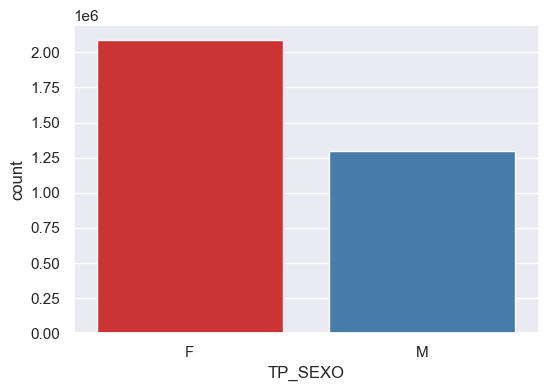

In [16]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(data=df_enem2021, x='TP_SEXO', palette='Set1')

### Por Raça

<Axes: xlabel='TP_COR_RACA', ylabel='count'>

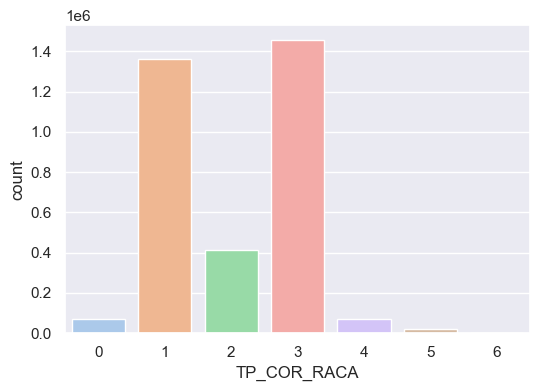

In [17]:
#Análise da distribuição dos candidatos por raça
'''
0	Não declarado
1	Branca
2	Preta
3	Parda
4	Amarela
5	Indígena 
6	Não dispõe da informação
'''
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(data=df_enem2021, x='TP_COR_RACA', palette='pastel')

### Pela escolaridade dos Pais/Responsáveis

In [9]:
# criação de novas variáveis para delimitar pais que possuem nível superiror
df_enem2021['pai_possui_superior'] = df_enem2021['Q001'].isin(['F','G'])


In [10]:
df_enem2021['mae_possui_superior'] = df_enem2021['Q002'].isin(['F','G'])

In [11]:
df_enem2021.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,None,None,NaN,NaN,NaN,Nova Lima,MG,0,1,1,0,NaN,574.60,472.60,NaN,1,1.00,140.00,120.00,120.00,180.00,200.00,760.00,F,F,B,B,3.00,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B,True,True
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,None,None,NaN,NaN,NaN,Maceió,AL,1,1,1,1,505.90,551.80,498.30,461.50,1,1.00,120.00,120.00,120.00,120.00,80.00,560.00,B,B,B,B,3.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,False,False
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,None,None,NaN,NaN,NaN,Ferraz de Vasconcelos,SP,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.00,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B,False,False
3,210052128335,2021,3,M,1,3,1,2,0,2,1.00,0,Crato,CE,2.00,1.00,1.00,Crato,CE,1,1,1,1,580.70,678.90,638.90,659.50,0,1.00,120.00,180.00,120.00,200.00,160.00,780.00,B,B,B,B,6.00,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B,False,False
4,210051353021,2021,2,F,1,3,1,2,0,2,1.00,0,Redenção,CE,2.00,1.00,1.00,Acarape,CE,1,1,1,1,497.70,532.40,457.60,582.60,1,1.00,120.00,140.00,160.00,180.00,180.00,780.00,D,E,F,D,4.00,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B,False,False


In [12]:
df_enem2021['pai_possui_superior'].value_counts(normalize=True) * 100

False   84.42
True    15.58
Name: pai_possui_superior, dtype: float64

In [22]:
df_enem2021['mae_possui_superior'].value_counts(normalize=True) * 100

False   76.65
True    23.35
Name: mae_possui_superior, dtype: float64

### Pela Renda Familiar

In [23]:
'''
A	Nenhuma Renda
B	Até R$ 1.100,00
C	De R$ 1.100,01 até R$ 1.650,00.
D	De R$ 1.650,01 até R$ 2.200,00.
E	De R$ 2.200,01 até R$ 2.750,00.
F	De R$ 2.750,01 até R$ 3.300,00.
G	De R$ 3.300,01 até R$ 4.400,00.
H	De R$ 4.400,01 até R$ 5.500,00.
I	De R$ 5.500,01 até R$ 6.600,00.
J	De R$ 6.600,01 até R$ 7.700,00.
K	De R$ 7.700,01 até R$ 8.800,00.
L	De R$ 8.800,01 até R$ 9.900,00.
M	De R$ 9.900,01 até R$ 11.000,00.
N	De R$ 11.000,01 até R$ 13.200,00.
O	De R$ 13.200,01 até R$ 16.500,00.
P	De R$ 16.500,01 até R$ 22.000,00.
'''
df_enem2021['Q006'].value_counts().sort_index()


A    202114
B    932838
C    575943
D    432478
E    209943
F    233353
G    195709
H    151384
I     93898
J     57492
K     45090
L     39388
M     57363
N     35865
O     39169
P     39117
Q     48686
Name: Q006, dtype: int64

In [24]:
#Tranformação da lista de letras para números
from string import ascii_uppercase

dicionario_renda = dict()

for i, letra in enumerate(ascii_uppercase):
    if i == 17:  # até a letra Q (17)
        break
    dicionario_renda[letra] = i
    
df_enem2021['renda_familiar'] = df_enem2021['Q006'].map(dicionario_renda)
df_enem2021['renda_familiar'].value_counts().sort_index()

0.00     202114
1.00     932838
2.00     575943
3.00     432478
4.00     209943
5.00     233353
6.00     195709
7.00     151384
8.00      93898
9.00      57492
10.00     45090
11.00     39388
12.00     57363
13.00     35865
14.00     39169
15.00     39117
16.00     48686
Name: renda_familiar, dtype: int64

<Axes: xlabel='renda_familiar', ylabel='count'>

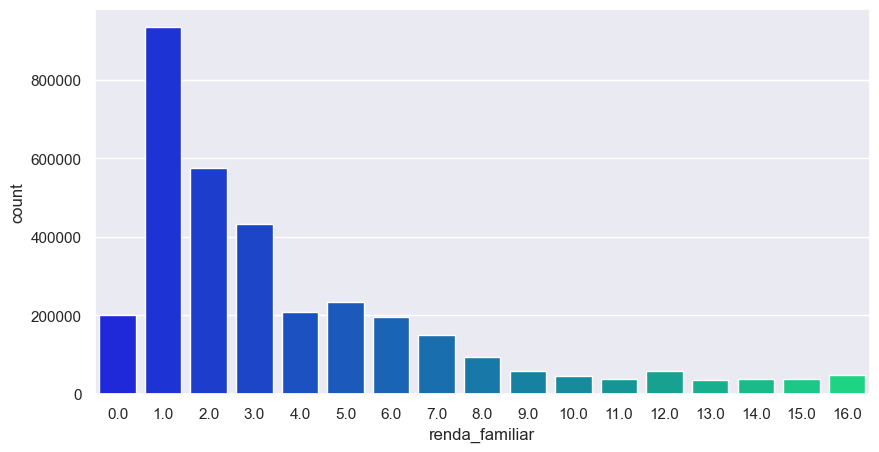

In [25]:
#Distribuição de candidatos por Renda Familiar
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data=df_enem2021, x='renda_familiar', palette='winter')

## <a>Relação entre as notas e as informações dos candidatos</a>

Avaliação das notas dos candidatos frente às demais informações para geração de <i>insights</i>.

### Notas x Sexo

In [26]:
df_sexo = df_enem2021.loc[:, colunas_notas + ['TP_SEXO']]
df_sexo.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,574.60,472.60,NaN,760.00,F
1,505.90,551.80,498.30,461.50,560.00,M
2,NaN,NaN,NaN,NaN,NaN,F
3,580.70,678.90,638.90,659.50,780.00,M
4,497.70,532.40,457.60,582.60,780.00,F


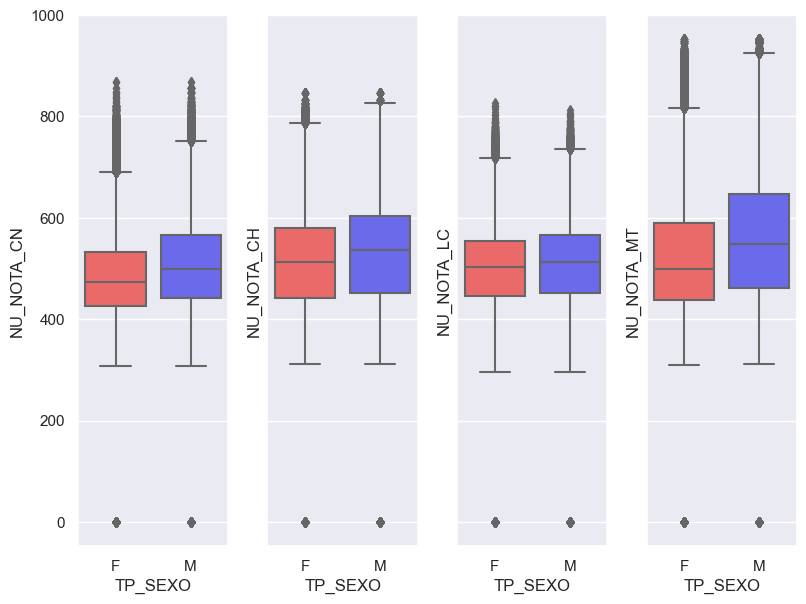

In [27]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1,4,sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_sexo,y=coluna_1, x='TP_SEXO', ax=graficos[i],palette='seismic_r')
    
    
 

### Notas x Raça

In [28]:
df_raca = df_enem2021.loc[:, colunas_notas + ['TP_COR_RACA']]
df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,574.60,472.60,NaN,760.00,1
1,505.90,551.80,498.30,461.50,560.00,1
2,NaN,NaN,NaN,NaN,NaN,1
3,580.70,678.90,638.90,659.50,780.00,3
4,497.70,532.40,457.60,582.60,780.00,3


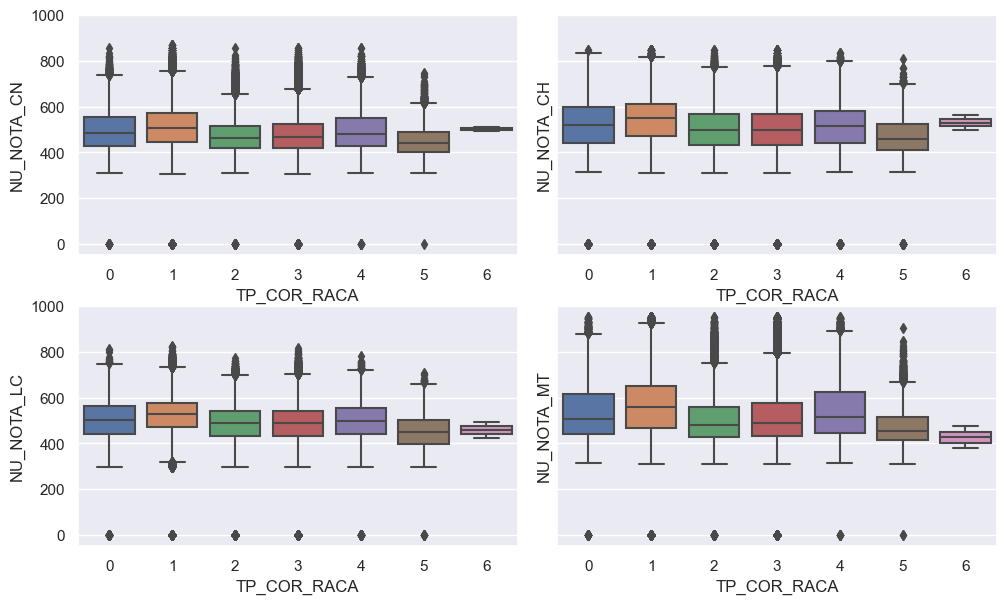

In [29]:
'''
0	Não informado 
1	Branca  
2	Preta  
3	Parda  
4	Amarela  
5	Indígena
6	Não dispõe da infomação
'''

sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(2):
    coluna_1 = colunas_notas[i*2] # 0 e 2
    coluna_2 = colunas_notas[i*2+1] # 1 e 3
    sns.boxplot(data=df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i][0])
    sns.boxplot(data=df_raca, y=coluna_2, x='TP_COR_RACA', ax=graficos[i][1])

### Notas x Região do País

In [13]:
#Insere uma série para classificação como Região a partir do campo 'SG_UF_PROVA

df_enem2021['REGIAO'] = np.where(df_enem2021['SG_UF_PROVA'].isin(['TO', 'AP', 'PA', 'RR', 'AM', 'AC', 'RO']),'Norte',
                             np.where(df_enem2021['SG_UF_PROVA'].isin(['BA', 'SE', 'AL', 'PE', 'PB', 'RN', 'CE', 'PI', 'MA']),'Nordeste',
                             np.where(df_enem2021['SG_UF_PROVA'].isin(['DF','GO','MT','MS']),'Centro-Oeste',
                             np.where(df_enem2021['SG_UF_PROVA'].isin(['SP', 'RJ', 'ES', 'MG']),'Sudeste',
                             np.where(df_enem2021['SG_UF_PROVA'].isin(['RS', 'SC','PR']),'Sul',
                             'Error')))))

<Axes: xlabel='REGIAO', ylabel='count'>

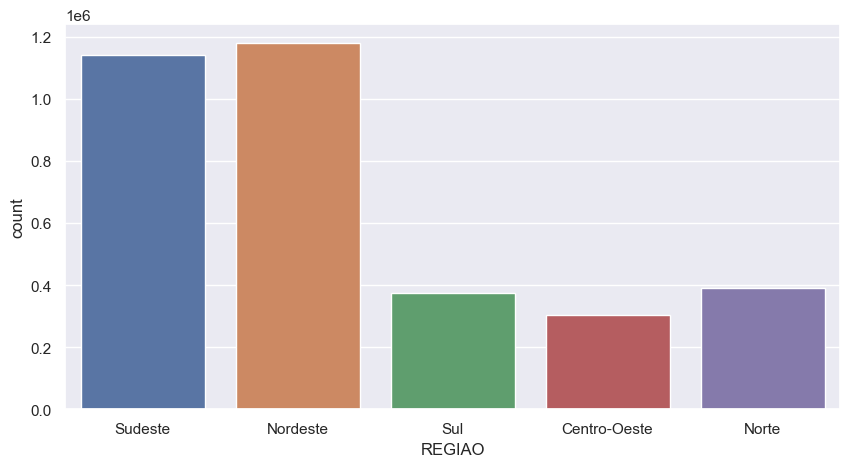

In [47]:
#Mostrar a distribuição de candidatos pelas regiões do país
sns.set_theme(style="darkgrid")
sns.countplot(data=df_enem2021, x='REGIAO')

In [33]:
df_regiao = df_enem2021.loc[:, colunas_notas + ['REGIAO']]
df_regiao.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,REGIAO
0,NaN,574.60,472.60,NaN,760.00,Sudeste
1,505.90,551.80,498.30,461.50,560.00,Nordeste
2,NaN,NaN,NaN,NaN,NaN,Sudeste
3,580.70,678.90,638.90,659.50,780.00,Nordeste
4,497.70,532.40,457.60,582.60,780.00,Nordeste


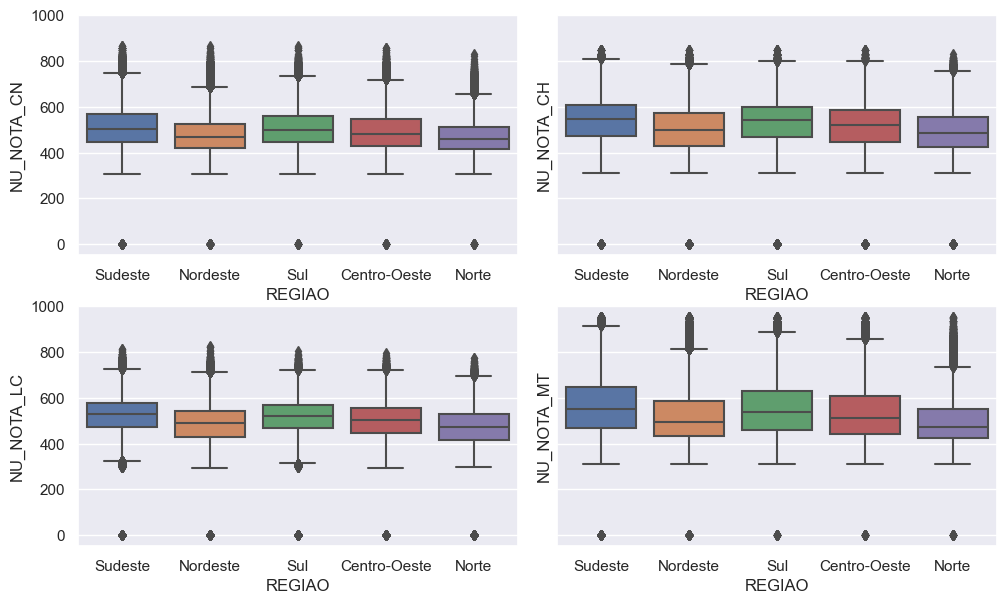

In [34]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(2):
    coluna_1 = colunas_notas[i*2] # 0 e 2
    coluna_2 = colunas_notas[i*2+1] # 1 e 3
    sns.boxplot(data=df_regiao, y=coluna_1, x='REGIAO', ax=graficos[i][0])
    sns.boxplot(data=df_regiao, y=coluna_2, x='REGIAO', ax=graficos[i][1])

### Notas x Renda Familiar


<Axes: >

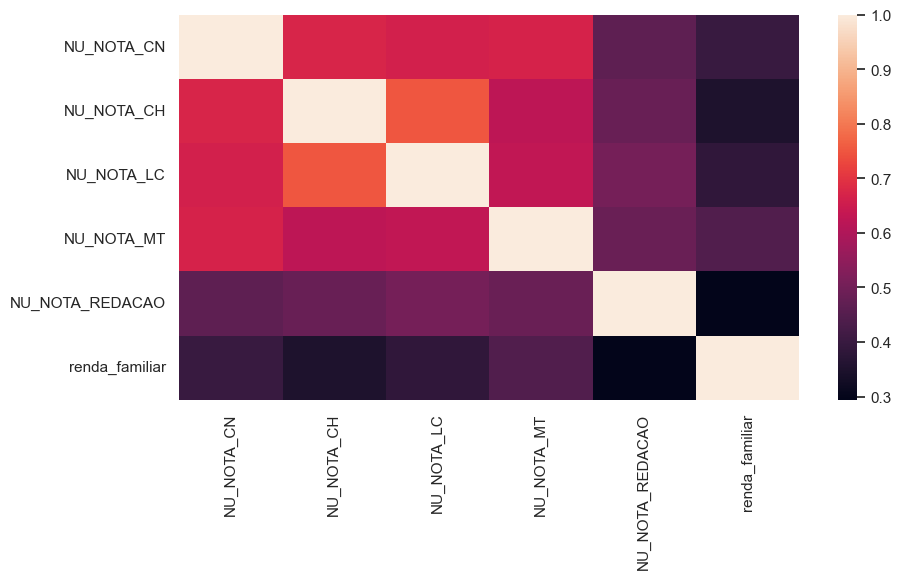

In [35]:
# mapa de calor para verificar relação entre as notas das provas e a Renda Familiar
df_renda = df_enem2021.loc[:, colunas_notas + ['renda_familiar']]
correlacoes_renda = df_renda.corr()
sns.heatmap(correlacoes_renda)

### Notas x Acesso à internet na residência


In [36]:
df_internet = df_enem2021.loc[:, colunas_notas + ['Q025']]

In [40]:
df_enem2021['Q025'].value_counts(normalize=True) * 100

B   89.61
A   10.39
Name: Q025, dtype: float64

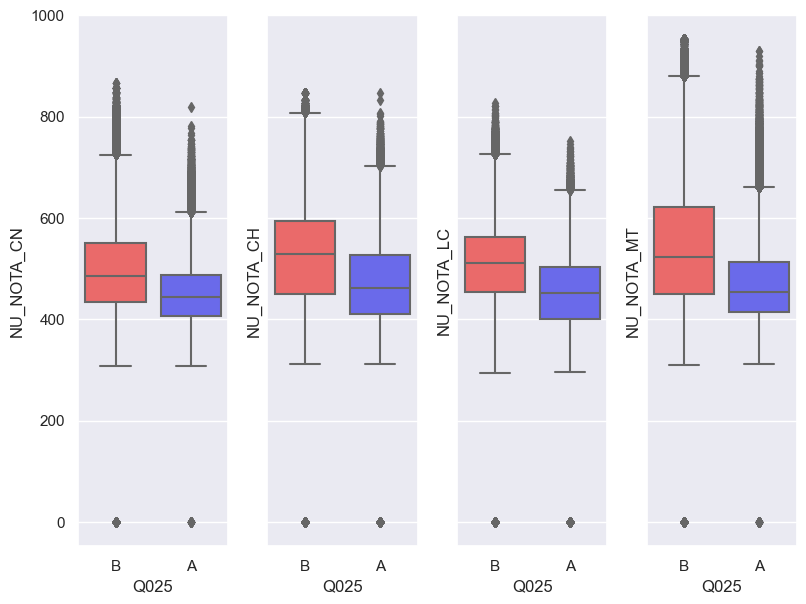

In [37]:
'''
A	Não.
B	Sim.
'''


sns.set_style("darkgrid")
figura, graficos = plt.subplots(1,4,sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_internet,y=coluna_1, x='Q025', ax=graficos[i],palette='seismic_r')

### Acesso à internet na Residência x Região do País

In [14]:
df_regiao_net = df_enem2021.loc[:, ['REGIAO'] + ['Q025']]

In [41]:
df_regiao_net.head()

,REGIAO,Q025
0,Sudeste,B
1,Nordeste,A
2,Sudeste,B
3,Nordeste,B
4,Nordeste,B


<Axes: xlabel='Q025', ylabel='count'>

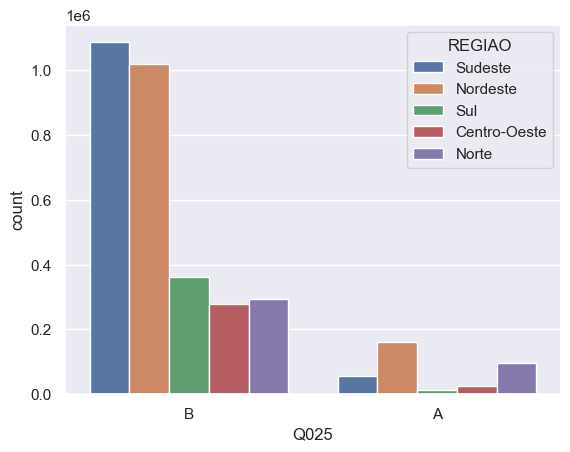

In [15]:
'''
A	Não.
B	Sim.
'''
sns.set_theme(style="darkgrid")
sns.countplot(data=df_regiao_net, x='Q025', hue='REGIAO')

### Notas x Escolaridade dos Pais/Responsáveis

In [16]:
df_esc_pais = df_enem2021.loc[:, colunas_notas + ['pai_possui_superior', 'mae_possui_superior']]
df_esc_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior
0,NaN,574.60,472.60,NaN,140.00,120.00,120.00,180.00,200.00,760.00,True,True
1,505.90,551.80,498.30,461.50,120.00,120.00,120.00,120.00,80.00,560.00,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,580.70,678.90,638.90,659.50,120.00,180.00,120.00,200.00,160.00,780.00,False,False
4,497.70,532.40,457.60,582.60,120.00,140.00,160.00,180.00,180.00,780.00,False,False


#### Notas x Possui um dos responsáveis com nível superior

In [22]:
#Cria coluna com pelo menos um dos responsáveis possui nível superior

df_esc_pais['algum_resp_possui_superior'] = (df_esc_pais['pai_possui_superior'] | df_esc_pais['mae_possui_superior'])
df_esc_pais.head(30)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior,algum_resp_possui_superior
0,NaN,574.60,472.60,NaN,140.00,120.00,120.00,180.00,200.00,760.00,True,True,True
1,505.90,551.80,498.30,461.50,120.00,120.00,120.00,120.00,80.00,560.00,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
3,580.70,678.90,638.90,659.50,120.00,180.00,120.00,200.00,160.00,780.00,False,False,False
4,497.70,532.40,457.60,582.60,120.00,140.00,160.00,180.00,180.00,780.00,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
6,NaN,511.90,420.40,NaN,100.00,120.00,100.00,120.00,40.00,480.00,False,False,False
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True
8,487.40,476.50,450.70,493.40,120.00,120.00,80.00,100.00,100.00,520.00,False,False,False
9,507.60,539.20,494.60,413.30,80.00,120.00,80.00,80.00,20.00,380.00,False,False,False


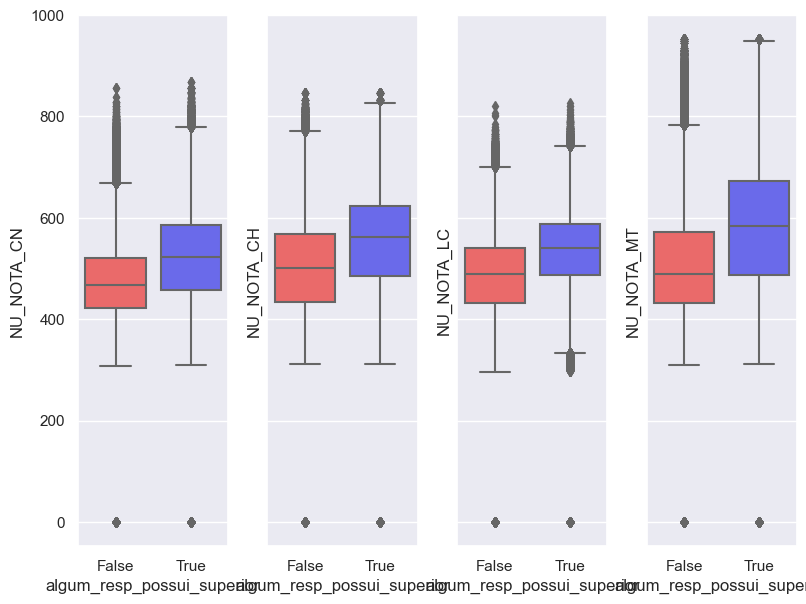

In [19]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_esc_pais, y=coluna_1, x='algum_resp_possui_superior', ax=graficos[i],palette='seismic_r')

In [32]:
df_regiao_esc_pais = pd.concat([df_esc_pais,df_regiao_net], axis=1)

In [33]:
df_regiao_esc_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior,algum_resp_possui_superior,REGIAO,Q025
0,NaN,574.60,472.60,NaN,140.00,120.00,120.00,180.00,200.00,760.00,True,True,True,Sudeste,B
1,505.90,551.80,498.30,461.50,120.00,120.00,120.00,120.00,80.00,560.00,False,False,False,Nordeste,A
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,Sudeste,B
3,580.70,678.90,638.90,659.50,120.00,180.00,120.00,200.00,160.00,780.00,False,False,False,Nordeste,B
4,497.70,532.40,457.60,582.60,120.00,140.00,160.00,180.00,180.00,780.00,False,False,False,Nordeste,B


<Axes: xlabel='algum_resp_possui_superior', ylabel='count'>

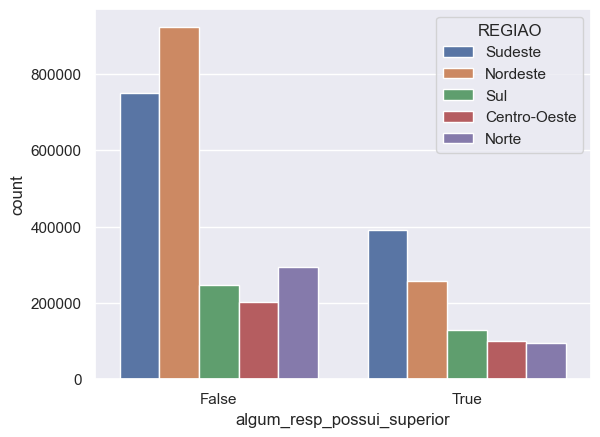

In [34]:
sns.set_theme(style="darkgrid")
sns.countplot(data=df_regiao_esc_pais, x='algum_resp_possui_superior', hue='REGIAO')

In [35]:
df_regiao_esc_pais['algum_resp_possui_superior'].value_counts(normalize=True) * 100

False   71.35
True    28.65
Name: algum_resp_possui_superior, dtype: float64

# <a>Conclusões</a>

Após análise dos dados, podemos observar que algumas características levantadas acima possuem correlação com a nota final, e por consequência, classificação do candidato.

Entre elas:

- Candidatos indígenas tiveram notas menores do que as demais designações;
- Candidatos das regiões sul e sudeste obtiveram as maiores notas, enquanto candidatos da região norte obtiveram as menores;
- Candidatos que possuem algum dos responsáveis com nível superior obtiveram melhores notas;
- Candidatos que possuem internet em casa obtiveram melhores notas;

De acordo com as informações levantadas, é possível verificar que o ENEM de 2021 ainda foi fortemente impactado pela pandemia de COVID-19, fazendo com que os alunos sem fácil acesso à internet, tivessem notas muito abaixo dos demais. Também pudemos constatar que a falta de acesso à internet concentrou-se nas regiões norte e nordeste, prejudicando ainda mais os candidatos das mesmas.